
# Table des matières



💈Introduction à Tensorflow / Keras.



## Preamble



### Imports



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import kerastuner as kt

from keras.models import Sequential
from keras.layers import Dense, Normalization
from keras.datasets import boston_housing

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.7.0


### Functions



In [2]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

### Seaborn



In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Wrangling



### Load Data



In [4]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=0)
x_train.shape, x_test.shape

((404, 13), (102, 13))

Variables are in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)<sup>2</sup> where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's



In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

target = ['MEDV']

### Glimpse at the data



In [6]:
df = pd.DataFrame(x_train, columns=feature_names)
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.679332,8.987260,0.00632,0.082973,0.26888,3.489463,88.9762
ZN,404.0,11.095297,22.709820,0.00000,0.000000,0.00000,12.500000,95.0000
INDUS,404.0,11.112574,6.700988,0.74000,5.560000,9.69000,18.100000,27.7400
CHAS,404.0,0.069307,0.254290,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.553192,0.115692,0.38500,0.449000,0.53800,0.624000,0.8710
RM,404.0,6.269668,0.691405,3.56100,5.877750,6.18900,6.620500,8.7800
AGE,404.0,68.315594,27.903730,2.90000,45.075000,76.50000,94.150000,100.0000
DIS,404.0,3.827602,2.160893,1.12960,2.077100,3.27210,5.214600,12.1265
RAD,404.0,9.485149,8.626365,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,406.289604,164.010811,187.00000,284.000000,334.50000,666.000000,711.0000


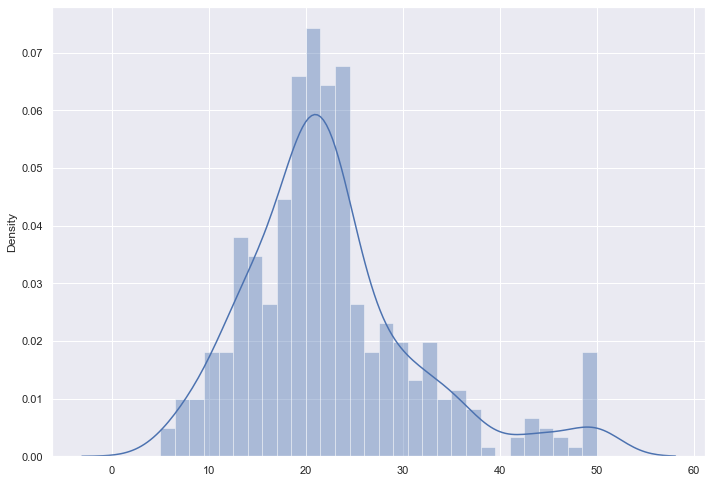

In [7]:
sns.distplot(y_train, bins=30)
plt.show()

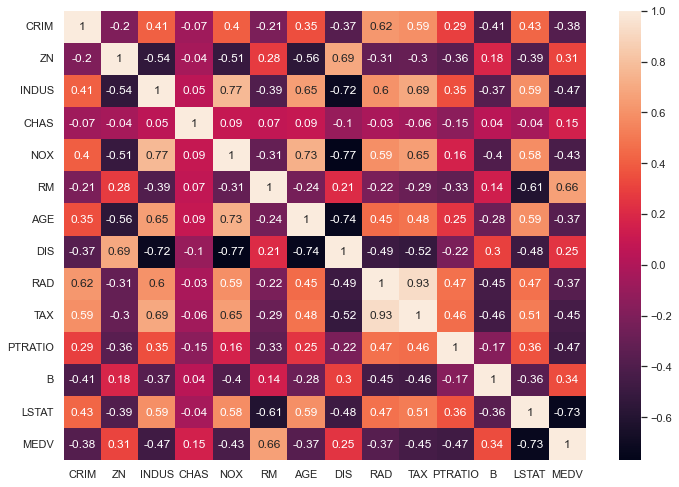

In [8]:
df['MEDV'] = y_train
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Baseline



### Feature Scaling



In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.854290583096463
R2 score is 0.7050376322888062


The model performance for testing set
--------------------------------------
RMSE is 4.060118093883478
R2 score is 0.8388807032132853


## Save the Data



In [12]:
train = pd.DataFrame(np.c_[X_train, y_train], columns=df.columns)
test = pd.DataFrame(np.c_[X_test, y_test], columns=df.columns)
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

## Bibliography



### References:PROPERTIES:




[perceptrons.bib](perceptrons.bib)

